# Document scanner
https://www.pyimagesearch.com/2014/09/01/build-kick-ass-mobile-document-scanner-just-5-minutes/

In [1]:
from pyimagesearch.transform import four_point_transform
from skimage.filters import threshold_local
import numpy as np
import argparse
import cv2
import imutils
import matplotlib.pyplot as plt

from pylab import rcParams
rcParams['figure.figsize'] = 30, 15

## Configuration

In [2]:
image_path = "images/receipt.jpg"

## Edge detection

Text(0.5, 1.0, 'Edged')

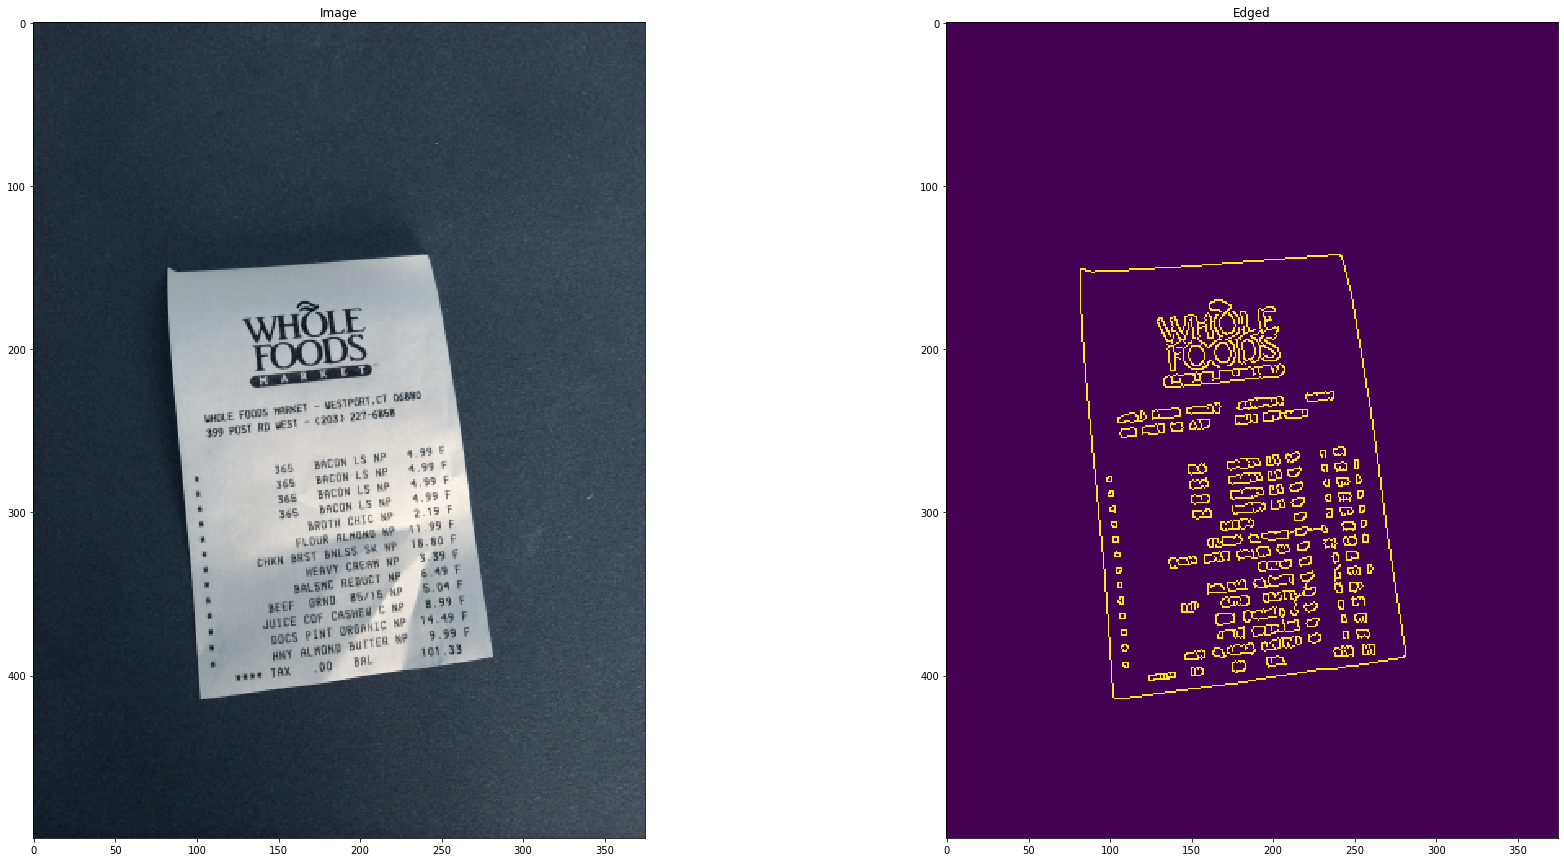

In [3]:
# Load the image and compute the ratio of the old height to the new height, clone it, and resize it
image = cv2.imread(image_path)
image = np.rot90(image)
ratio = image.shape[0] / 500.0
orig = image.copy()
image = imutils.resize(image, height = 500)

# Convert the image to grayscale, blur it, and find edges in the image
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0)
edged = cv2.Canny(gray, 75, 200)

# Show the original image and the edge detected image
plt.subplot(121)
plt.imshow(image)
plt.title("Image")
plt.subplot(122)
plt.imshow(edged)
plt.title("Edged")

## Finding contours

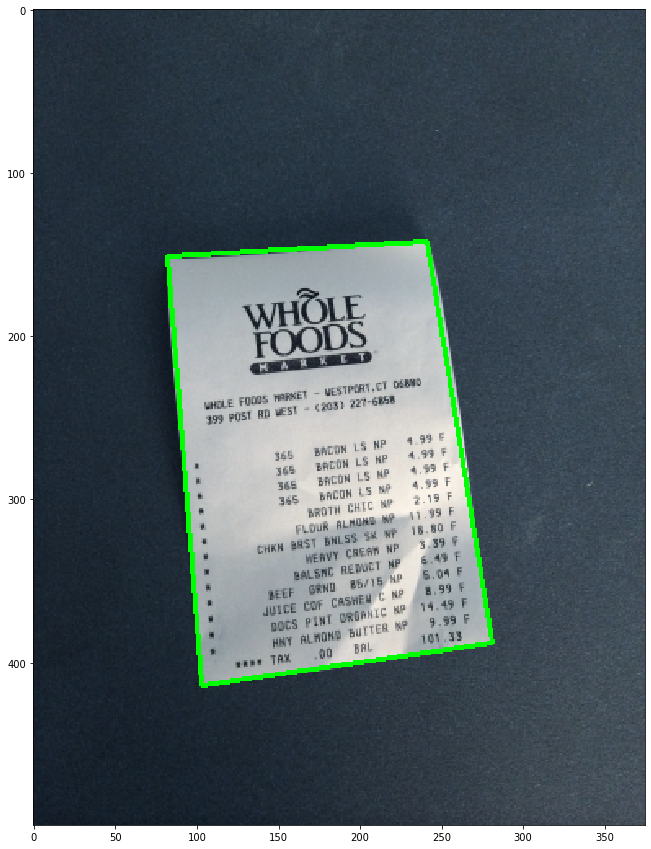

In [4]:
# Find the contours in the edged image, keeping only the largest ones, and initialize the screen contour
cnts = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

# Order them by decreasing area and pick the first 5
cnts = sorted(cnts, key = cv2.contourArea, reverse = True)[:5]

# Loop over the contours
for c in cnts:
    # Approximate the contour
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)
    # If our approximated contour has four points, then we can assume that we have found our document
    if len(approx) == 4:
        screenCnt = approx
        break

# Show the contour (outline) of the piece of paper
cv2.drawContours(image, [screenCnt], -1, (0, 255, 0), 2)
plt.imshow(image)

## Apply a Perspective Transform & Threshold

Text(0.5, 1.0, 'Scanned')

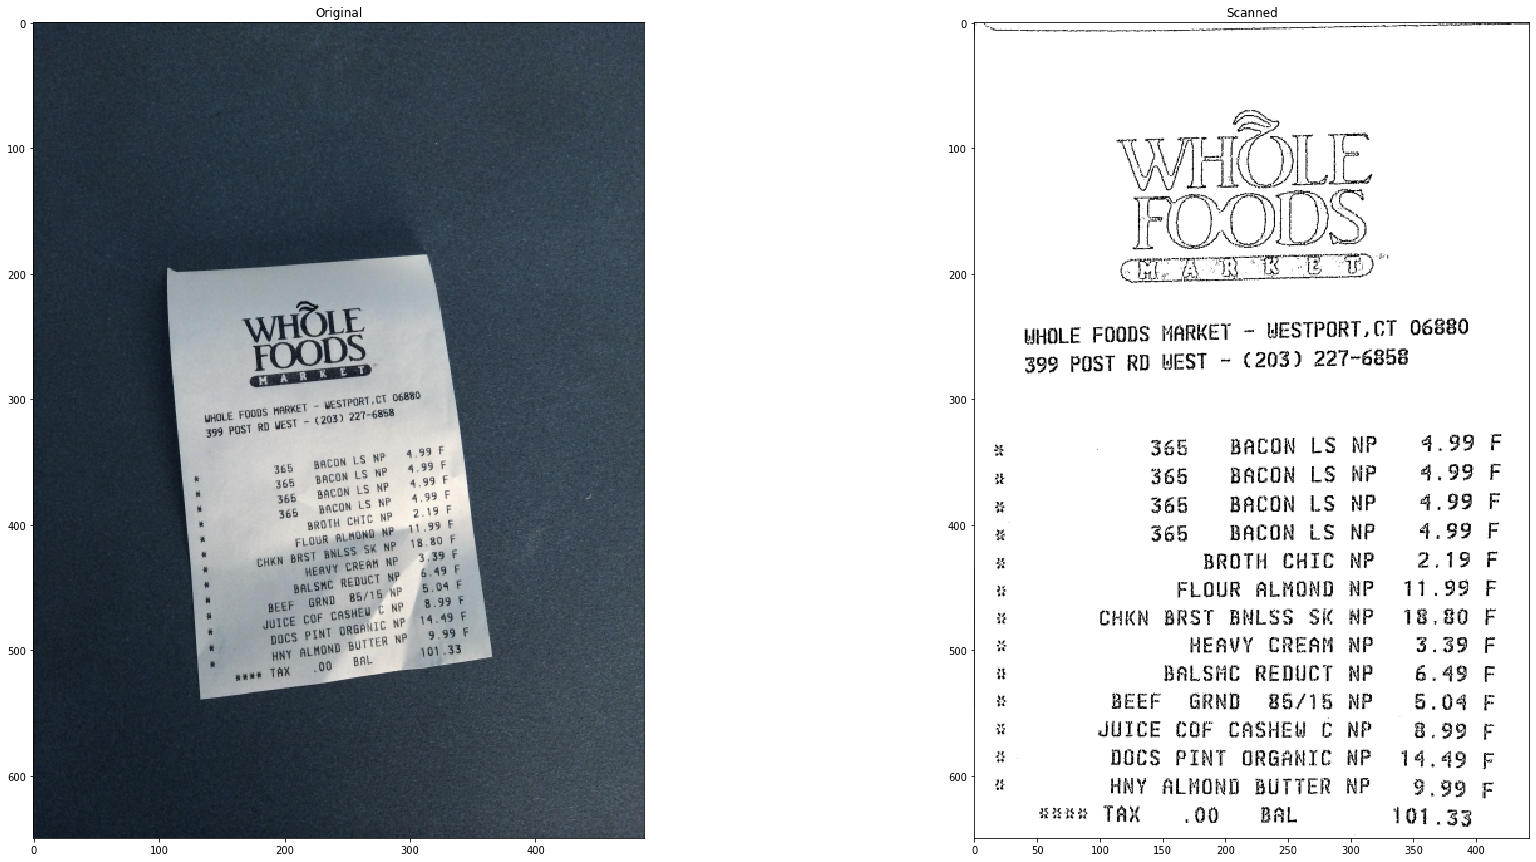

In [5]:
# Apply the four point transform to obtain a top-down view of the original image
warped = four_point_transform(orig, screenCnt.reshape(4, 2) * ratio)

# Convert the warped image to grayscale, then threshold it to give it that 'black and white' paper effect
warped = cv2.cvtColor(warped, cv2.COLOR_BGR2GRAY)
T = threshold_local(warped, 11, offset = 10, method = "gaussian")
warped = (warped > T).astype("uint8") * 255

# Show the original and scanned images
plt.subplot(121)
plt.imshow(imutils.resize(orig, height = 650))
plt.title("Original")
plt.subplot(122)
plt.imshow(imutils.resize(warped, height = 650), cmap="gray")
plt.title("Scanned")